In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.isotonic import IsotonicRegression
df = pd.read_csv('/Users/erenanbar/Desktop/internship_project/latency_predict/latency_data/ticketData_vs_latency.csv')
df.head(5)

,day,modelName,latency_avg,latency_max,latency_max_detection,ticket_size,total_size
0,2023-02-18,Arcadyan eLife Connect C1AA,22.5,24,0,0,1
1,2023-02-18,Arcadyan eLife Connect C1AA,24.0,25,0,0,1
2,2023-02-18,Arcadyan eLife Connect C1AA,25.5,28,0,0,1
3,2023-02-18,Arcadyan eLife Connect C1AA,27.0,27,0,0,2
4,2023-02-18,Arcadyan eLife Connect C1AA,29.0,29,0,0,1


(array([ 36474.,   8562.,  26230.,  90888., 686836., 175674.,  76429.,
         38671., 163836.,  39472.,  37009.,  21693.]),
 array([   0.,  100.,  200.,  300.,  400.,  450.,  500.,  550.,  600.,
         650.,  700.,  850., 1000.]),
 <BarContainer object of 12 artists>)

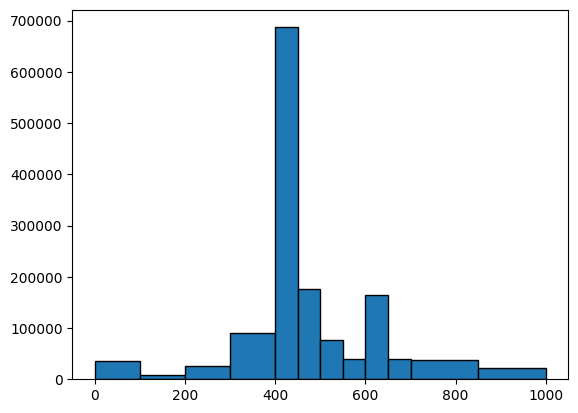

In [18]:
bins1 = np.arange(0,400,100)
bins2 = np.arange(400,700,50)
bins3 = np.arange(700,1001,150)
bins = np.concatenate((bins1,bins2))
bins = np.concatenate((bins,bins3))
df['latency_max_bin'] = pd.cut(df['latency_max'], 
                   bins=bins,
                   labels=range(1,len(bins)))
plt.hist(df['latency_max'],bins=bins, edgecolor = 'black')

In [19]:
df['latency_max_bin'].value_counts(sort=False)

latency_max_bin
1      36660
2       8703
3      25996
4     101935
5     681224
6     172873
7      74497
8      39467
9     163662
10     38727
11     36455
12     21575
Name: count, dtype: int64

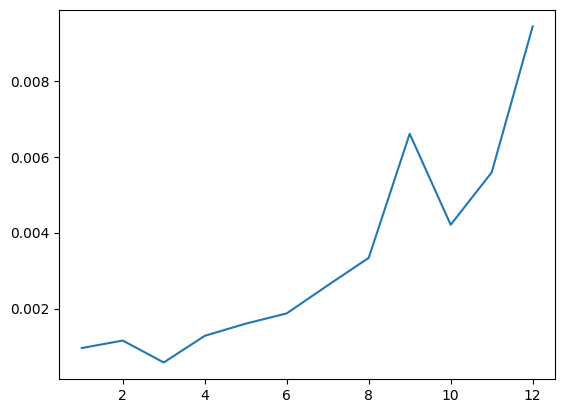

In [20]:
# calculate prob w.r.t. latency_max only
df_grouped = df.groupby(['modelName','latency_max_bin']).aggregate({'ticket_size':'sum','total_size':'sum'})
df_grouped['call_prob'] = df_grouped['ticket_size'] / df_grouped['total_size']
df_grouped = df_grouped.reset_index()

plt.plot(df_grouped.loc[df_grouped['modelName'] == 'DLink DIR-853/ET', 'latency_max_bin'], 
         df_grouped.loc[df_grouped['modelName'] == 'DLink DIR-853/ET', 'call_prob'])


In [21]:
from sklearn.isotonic import IsotonicRegression
isoR = IsotonicRegression(
        y_min=0,
        y_max=1,
        increasing=True,
        out_of_bounds="clip")

df_grouped = df.groupby(['modelName','latency_max_bin']).aggregate({'ticket_size':'sum','total_size':'sum'})
df_grouped['call_prob'] = df_grouped['ticket_size'] / df_grouped['total_size']
df_grouped = df_grouped.reset_index()

for model in df_grouped['modelName'].unique():
    X = df_grouped.loc[df_grouped['modelName'] == model, 'latency_max_bin']
    y = df_grouped.loc[df_grouped['modelName'] == model, 'call_prob'].fillna(0) 
    isoR_latency_avg = isoR.fit(X, y)
    df_grouped.loc[df_grouped['modelName'] == model, 'prob_predict'] = isoR_latency_avg.predict(X)
    

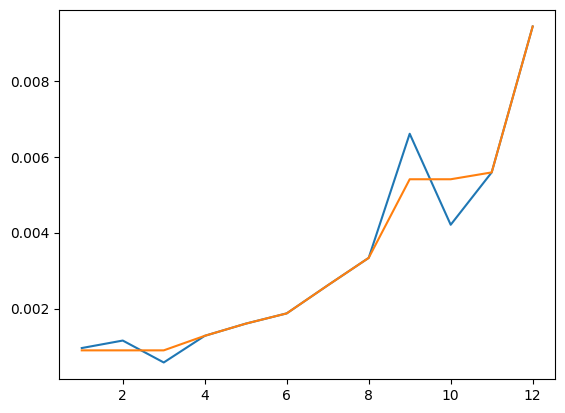

In [22]:
plt.plot(df_grouped.loc[df_grouped['modelName'] == 'DLink DIR-853/ET', 'latency_max_bin'], 
         df_grouped.loc[df_grouped['modelName'] == 'DLink DIR-853/ET', 'call_prob'])
plt.plot(df_grouped.loc[df_grouped['modelName'] == 'DLink DIR-853/ET', 'latency_max_bin'], 
         df_grouped.loc[df_grouped['modelName'] == 'DLink DIR-853/ET', 'prob_predict'])
